In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

import pandas as pd
import numpy as np
import random

# Model Evaluation
from sklearn.metrics import average_precision_score, roc_auc_score

# Model
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
path = '../data_treino1.csv'

data = pd.read_csv(path, sep=',')
data.head(3)

,tipo_imovel,m_quadrado,qntd_quartos,rua_imovel,bairro_imovel,aluguel,preco_total,img_imovel,e_seguro,y
0,Apartamento,25,1,RuaGenebra,BelaVista,1.950,2.375,https://www.quintoandar.com.br/img/med/8929948...,0,1
1,Apartamento,50,1,RuaAbolição,BelaVista,2.116,2.623,https://www.quintoandar.com.br/img/med/8929948...,0,0
2,Apartamento,56,1,RuaBrigadeiroTobias,Centro,1.000,1.456,https://www.quintoandar.com.br/img/med/8929307...,0,1


In [32]:
path2 = '../13-08-20_comy.csv'
path3 = '../14-08-20comy.csv'

data2 = pd.read_csv(path2, sep=',')
data3 = pd.read_csv(path3, sep=',')
data2.head()

,tipo_imovel,m_quadrado,qntd_quartos,rua_imovel,bairro_imovel,aluguel,preco_total,img_imovel,e_seguro,y
0,Studio e kitnet,29,1,RuadaGlória,Liberdade,2.600,2.854,www.quintoandar.com.br/img/med/893123455-727.1...,0,0
1,Studio e kitnet,28,1,RuadaGlória,Liberdade,2.500,2.744,www.quintoandar.com.br/img/med/893122647-339.9...,0,0
2,Casa,30,1,RuaJoãodeCarvalho,Liberdade,1.897,1.929,www.quintoandar.com.br/img/med/893119431-276.5...,0,1
3,Apartamento,40,1,AvenidaRangelPestana,Liberdade,1.260,1.726,www.quintoandar.com.br/img/med/893120782-452.3...,0,1
4,Studio e kitnet,25,1,RuaConselheiroFurtado,Liberdade,1.900,2.249,www.quintoandar.com.br/img/med/893114519-409.7...,0,0


In [33]:
df = pd.concat([data, data2, data3])
print(f'treinaremos com:{df.shape[0]}')

treinaremos com:122


In [36]:
le_tipo = LabelEncoder().fit(df['tipo_imovel'])
le_rua  = LabelEncoder().fit(df['rua_imovel'])
le_bairro=LabelEncoder().fit(df['bairro_imovel'])

df['tipo_imovel'] = le_tipo.transform(df['tipo_imovel'])
df['rua_imovel'] = le_rua.transform(df['rua_imovel'])
df['bairro_imovel'] = le_bairro.transform(df['bairro_imovel']) 

In [79]:
jb.dump(le_tipo, 'label_tipo_imovel.pkl.z')
jb.dump(le_rua, 'label_rua_imovel.pkl.z')
jb.dump(le_bairro, 'label_bairro_imovel.pkl.z')

['label_bairro_imovel.pkl.z']

In [35]:
type(df)

pandas.core.frame.DataFrame

In [18]:
le_tipo.classes_

array([0, 1, 2, 3])

In [10]:
le.classes_

array(['Aclimação', 'BelaVista', 'BomRetiro', 'Brás', 'Cambuci', 'Centro',
       'Consolação', 'Liberdade', 'Mooca', 'SantaCecília'], dtype=object)

In [37]:
x = df.drop(['y','img_imovel'] ,axis=1)
y = df['y']
x_treino, x_val, y_treino, y_val = train_test_split(x, y, test_size=0.1)

print(f"Treinaremos com X:{x_treino.shape}, Y:{y_treino.shape}")
print(f"Treinaremos com X:{x_val.shape}, Y:{y_val.shape}")

Treinaremos com X:(109, 8), Y:(109,)
Treinaremos com X:(13, 8), Y:(13,)


# Modelagem

In [40]:
def avaliar_modelo(predicted_value, y_true):    
    ap = average_precision_score(predicted_value, y_true)
    roc = roc_auc_score(predicted_value, y_true)
    
    print("="*30)
    print('Model summary:')
    print(f'Avarege precision: {round(ap, 5)}')
    print(f'Roc: {round(roc, 5)}')
    print("="*30)

In [71]:
resultados[:,1]

array([0.16      , 0.35      , 0.36166667, 0.67      , 0.505     ,
       0.922     , 0.82      , 0.05      , 0.17875   , 0.79      ,
       0.37      , 0.84      , 0.15      ])

In [81]:
x_val.drop('teste', axis=1, inplace=True)

C:\Users\caooc\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
resultados[2]

array([0.63833333, 0.36166667])

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    # Cria uma lista de vars
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Cria um dataframe
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + 'Importancia das variaveis')
    plt.xlabel('Importancia')
    plt.ylabel('Nome da variavel')


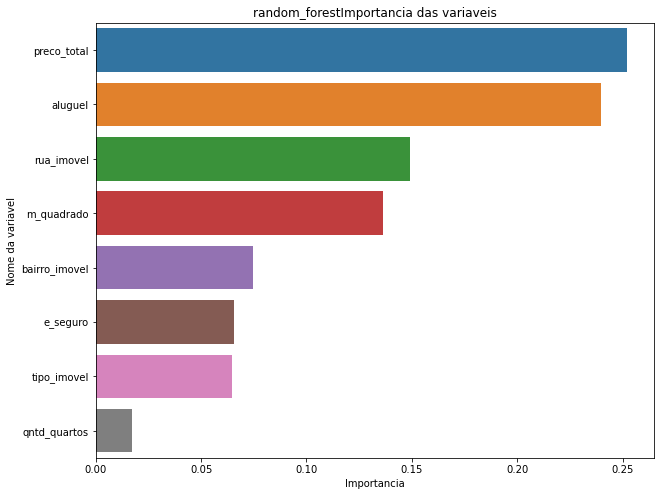

In [46]:
plot_feature_importance(model_rf.feature_importances_, x_val.columns, 'random_forest')

In [41]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(x_treino, y_treino)
preds = model_rf.predict(x_val)
avaliar_modelo(preds, y_val)

Model summary:
Avarege precision: 0.91026
Roc: 0.91667


In [73]:
# Light GBM - um dos meus modelos favoritos <3
model_lgb = LGBMClassifier(random_state=0, n_jobs=6)
model_lgb.fit(x_treino, y_treino)
preds = model_lgb.predict(x_val)
avaliar_modelo(preds, y_val)

Model summary:
Avarege precision: 0.71692
Roc: 0.8375


In [85]:
resultados_rf = model_rf.predict_proba(x_val)
resultados_lgb = model_lgb.predict_proba(x_val)
p = 0.6 * resultados_lgb[:, 1] + 0.4* resultados_rf[:, 1]
p

array([0.31274516, 0.25474954, 0.28008749, 0.63567404, 0.62926721,
       0.88350741, 0.75323256, 0.14369158, 0.13788587, 0.87917645,
       0.26163199, 0.62052549, 0.11373534])

In [84]:
# Bayesian Optimazation
from skopt import forest_minimize

def tune_lgbm(params):
    
    lr = params[0]
    max_depth = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    n_estimators = params[5]

    model = LGBMClassifier(learning_rate=lr, num_leaves = 2 ** max_depth, 
                           max_depth=max_depth, n_estimators=n_estimators,
                           min_child_samples=min_child_samples, random_state=0,
                           colsample_bytree = colsample_bytree, bagging_freq=1,
                           )
    
    model.fit(x_treino, y_treino)
    preds = model.predict(x_val)
    
    #print(roc_auc_score(y_val, preds))
    # Testar - media entre roc + apc
    
    return -average_precision_score(preds, y_val)

space = [(1e-3, 1e-1, 'log-uniform'),# Learning Rate
         (1, 10),      # Max_depth
         (1, 20),      #Min_child_Samples
         (0.05, 1.),   #Subsample
         (0.05, 1.),   #Colsample_bytree
         (100, 1000)]  #N_estimators

res = forest_minimize(tune_lgbm, space, random_state=160,
                      n_random_starts=20, n_calls=40)

C:\Users\caooc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [99]:
# Logistic Regression
data3 = data2.copy()

data3.drop('y', axis=1, inplace=True)

# Scalando todos os valores
max_ab = MaxAbsScaler().fit(data3.values)
data3 = max_ab.transform(data3)

x = data3
y = data2['y']

x_treino, x_val, y_treino, y_val = train_test_split(x, y, test_size=0.3)

model = LogisticRegression(C=10)
model.fit(x_treino, y_treino)
preds = model.predict(x_val)
avaliar_modelo(preds, y_val)

Model summary:
Avarege precision: 0.6
Roc: 0.875


In [74]:
# Ensemble final!
import joblib as jb

jb.dump(model_rf, 'randodm_forest.pkl.z')
jb.dump(model_lgb, 'lgbm.pkl.z')

['lgbm.pkl.z']